# Centrality computation example for inner London

`matplotlib` magic command (only necessary for `jupyter` notebooks).
Install `cityseer` if necessary.

In [2]:
%matplotlib inline
!pip install cityseer

## Data and graph cleaning

This example will make use of OSM data downloaded from the [OSM API](https://wiki.openstreetmap.org/wiki/API) for a 5000m radius around London Soho.

See the corresponding notebook on [graph cleaning](https://colab.research.google.com/github/cityseer/cityseer/blob/master/demo_notebooks/graph_cleaning.ipynb#scrollTo=Kys-0c6UvqLq) for more information.

In [3]:
import utm
from shapely import geometry

from cityseer.tools import graphs, mock

lng, lat = -0.13396079424572427, 51.51371088849723
G_utm = mock.make_buffered_osm_graph(lng, lat, 5000)

INFO:cityseer.tools.graphs:Converting networkX graph from WGS to UTM.
INFO:cityseer.tools.graphs:Processing node x, y coordinates.


  0%|          | 0/137683 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Processing edge geom coordinates, if present.


  0%|          | 0/155161 [00:00<?, ?it/s]

In [4]:
G = graphs.nX_simple_geoms(G_utm)
G = graphs.nX_remove_filler_nodes(G)
G = graphs.nX_remove_dangling_nodes(G,
                                    despine=20,
                                    remove_disconnected=True)
G = graphs.nX_remove_filler_nodes(G)
G1 = graphs.nX_consolidate_nodes(G,
                                 buffer_dist=10,
                                 min_node_group=3)
G2 = graphs.nX_split_opposing_geoms(G1,
                                    buffer_dist=15)
G3 = graphs.nX_consolidate_nodes(G2,
                                 buffer_dist=15,
                                 crawl=False,
                                 min_node_degree=2,
                                 cent_min_degree=4)

INFO:cityseer.tools.graphs:Generating simple (straight) edge geometries.


  0%|          | 0/155161 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/137683 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing dangling nodes.


  0%|          | 0/44875 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/40782 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Consolidating nodes.
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:767: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  p.uid = n
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:768: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  p.degree = nx.degree(networkX_multigraph, n)


  0%|          | 0/38123 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/31447 [00:00<?, ?it/s]

  0%|          | 0/48048 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Splitting opposing edges.
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:782: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  linestring.start_uid = s
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:783: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  linestring.end_uid = e
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:784: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  linestring.k = k


  0%|          | 0/31349 [00:00<?, ?it/s]

/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:1079: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(split_geoms) < 2:
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:1081: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  new_edge_geom_a, new_edge_geom_b = split_geoms


  0%|          | 0/49639 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Consolidating nodes.


  0%|          | 0/35314 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/24954 [00:00<?, ?it/s]

  0%|          | 0/39756 [00:00<?, ?it/s]

In [5]:
from cityseer.metrics import networks

G_decomp = graphs.nX_decompose(G3, 25)
# create a Network layer from the networkX graph
N = networks.NetworkLayerFromNX(G_decomp,
                                distances=[500, 2000])
# calculate centralities
# due to the area and resolution of the analysis, it is quicker to run this analysis on a machine with multiple cores
# e.g. 8 core 4.2GHz machine ~ 10 minutes
N.node_centrality(measures=['node_beta', 'node_betweenness'])

INFO:cityseer.tools.graphs:Decomposing graph to maximum edge lengths of 25.


  0%|          | 0/35296 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Preparing node and edge arrays from networkX graph.


  0%|          | 0/90229 [00:00<?, ?it/s]

  0%|          | 0/90229 [00:00<?, ?it/s]

INFO:cityseer.metrics.networks:Computing node_beta, node_betweenness centrality measures using shortest (non-angular) path heuristic.


  0%|          | 43.0/90229 [00:08<07:41, 195.22it/s]

/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/algos/centrality.py:251: NumbaWarning: Cannot cache compiled function "local_node_centrality" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(cache=True, fastmath=checks.fastmath, nogil=True, parallel=True)


100%|██████████| 90229.0/90229 [08:10<00:00, 183.85it/s]


In [71]:
# data can be extracted, plotted, or otherwise manipulated directly from the numpy arrays
# see the getting started guide if you'd prefer to first convert back to NetworkX
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale


def simple_plot(xs: np.ndarray,
                ys: np.ndarray,
                vals: np.ndarray):
    """ """
    # extents
    easting, northing = utm.from_latlon(lat, lng)[:2]
    buff = geometry.Point(easting, northing).buffer(3500)
    min_x, min_y, max_x, max_y = buff.bounds
    # fig
    fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=200, facecolor='white')
    # filter
    select = xs > min_x
    select = np.logical_and(select, xs < max_x)
    select = np.logical_and(select, ys > min_y)
    select = np.logical_and(select, ys < max_y)
    select_idx = np.where(select)[0]
    # remove any extreme outliers
    v = np.clip(vals, np.nanpercentile(vals, .01), np.nanpercentile(vals, 99.9))
    # shape if wanted
    c = v ** 1
    c = minmax_scale(c, feature_range=(0, 1))
    s = v ** 1.5
    s = minmax_scale(s, feature_range=(0, 1.5))
    # plot
    ax.scatter(xs[select_idx],
               ys[select_idx],
               c=c[select_idx],
               s=s[select_idx],
               linewidths=0,
               edgecolors='none',
               cmap='Reds')
    # limits
    ax.set_xlim(left=min_x, right=max_x)
    ax.set_ylim(bottom=min_y, top=max_y)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect(1)
    ax.set_facecolor('white')
    plt.show()

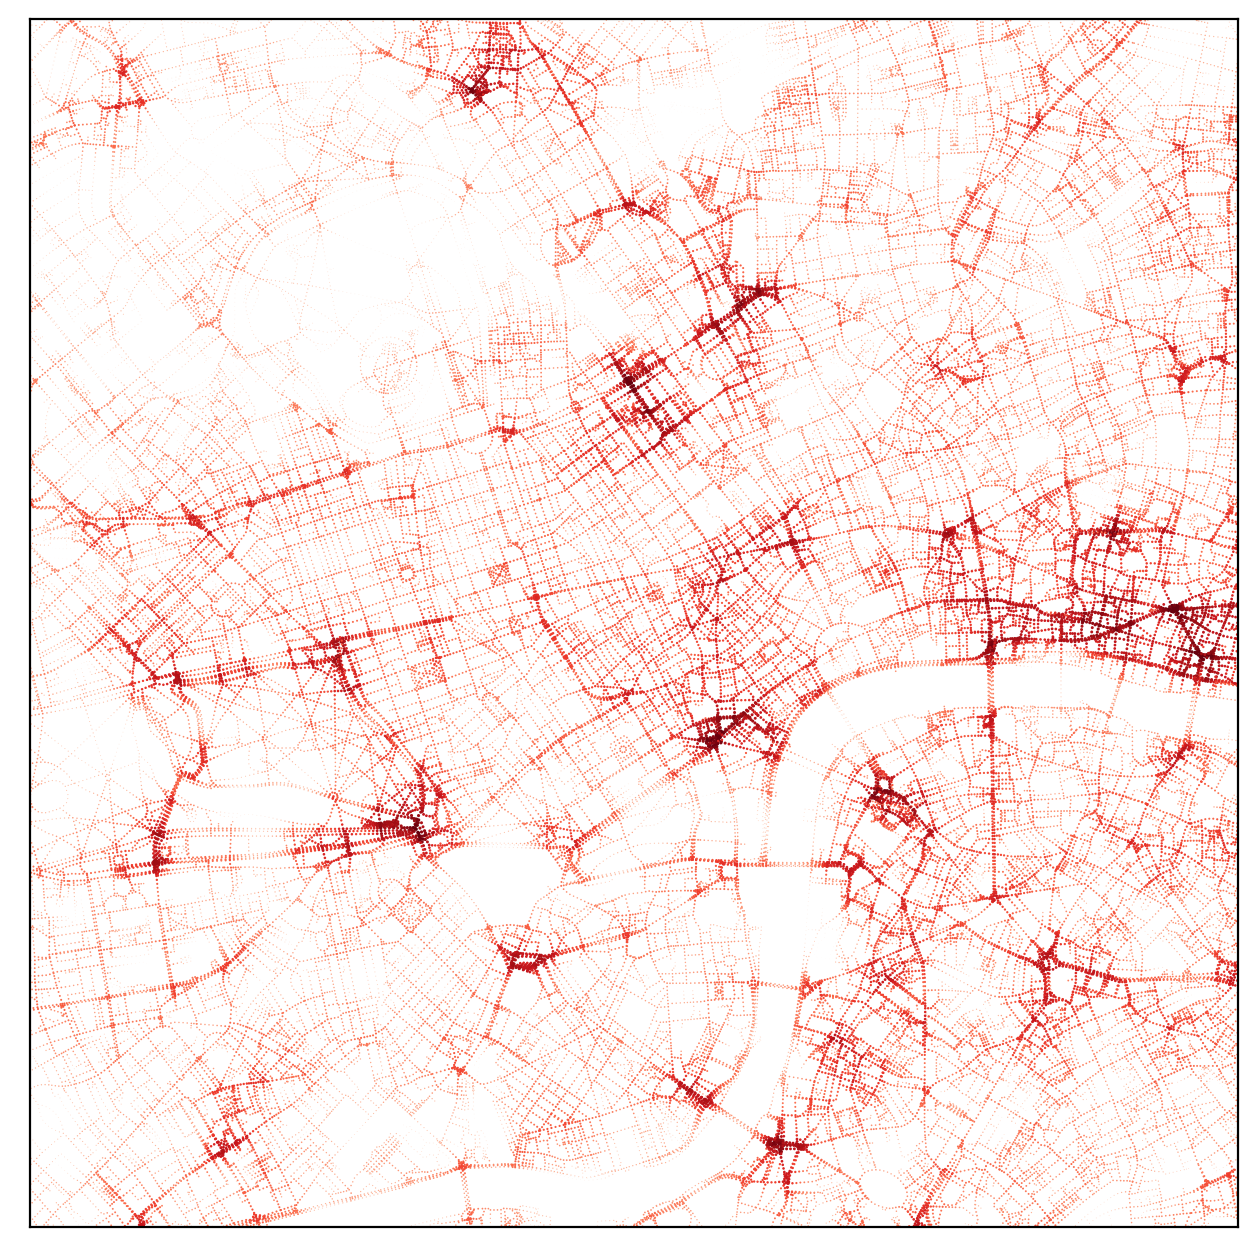

In [72]:
simple_plot(N.node_x_arr, N.node_y_arr, N.metrics['centrality']['node_beta'][500])

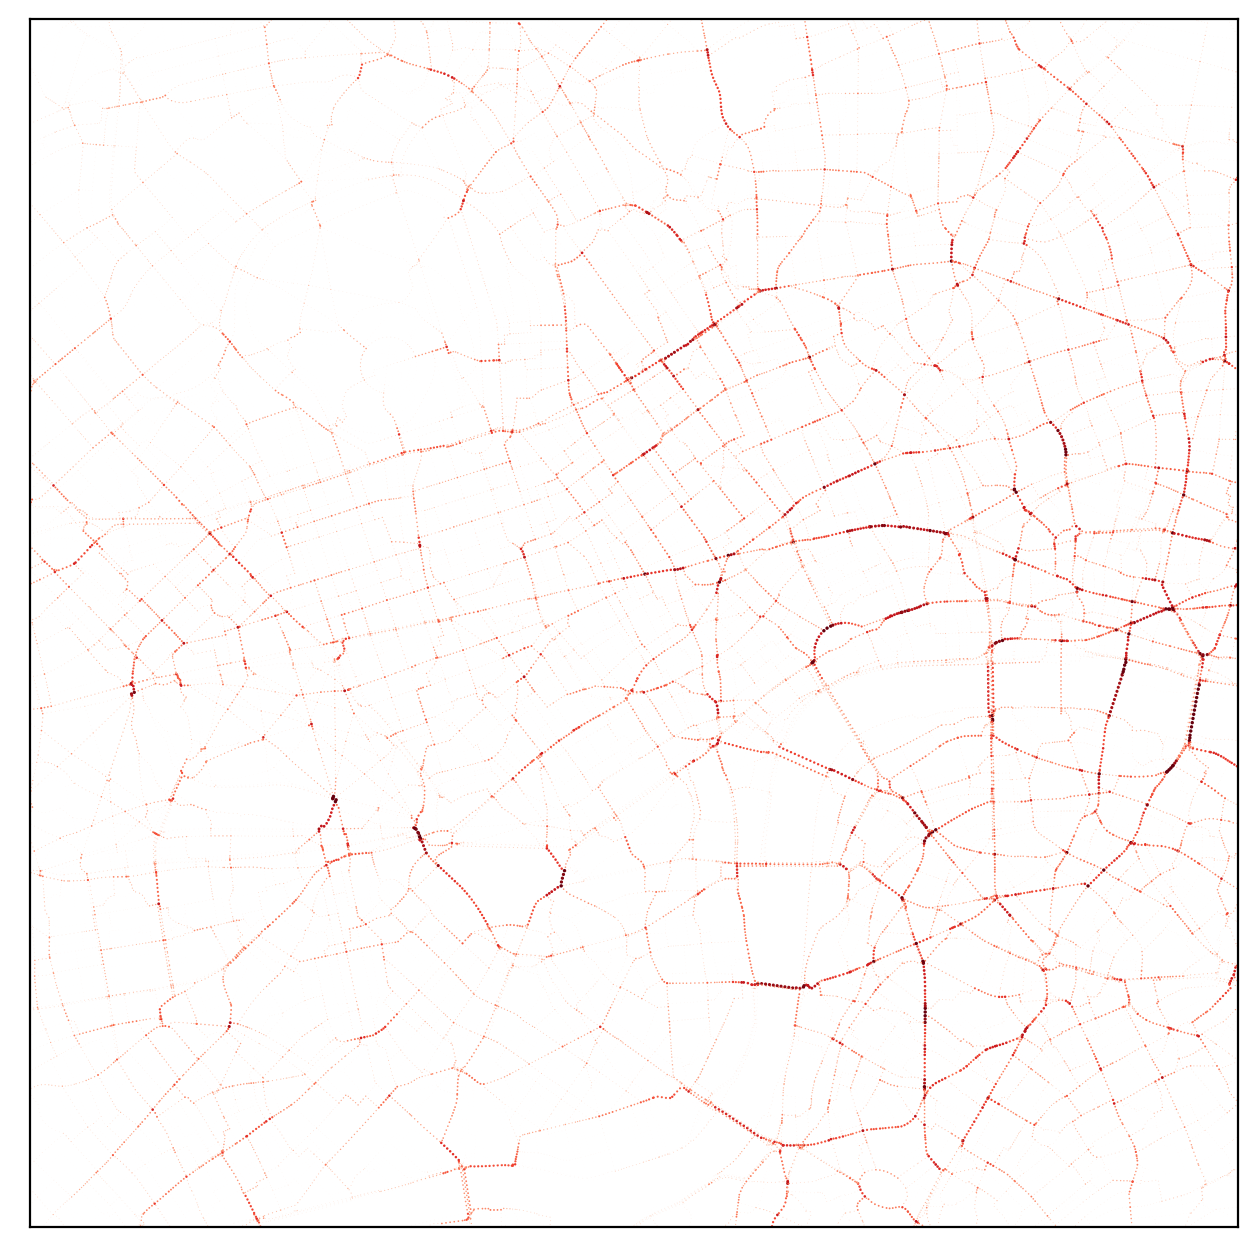

In [73]:
simple_plot(N.node_x_arr, N.node_y_arr, N.metrics['centrality']['node_betweenness'][2000])